In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
import seaborn as sns
import matplotlib.cm as cm
import itertools
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/train.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [7]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
# finding all the rows where the sum of labels is zero i.e the comment is a Clean comment
rowsums=df.iloc[:,2:].sum(axis=1)
df['clean']=(rowsums==0)
df['clean'].sum()

143346

In [10]:
# Total no.of toxic comments
len(df[df['toxic']==1])

15294

In [11]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,True
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,True
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,True
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,True


In [12]:
comment = df['comment_text']
for i in range(5):
    print(i,"- " + comment[i] + "\n Length -" ,len(comment[i]))

0 - Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
 Length - 264
1 - D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
 Length - 112
2 - Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
 Length - 233
3 - "
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have a

In [13]:
# creating a numpy array of the length of each comment in the dataset.
x = np.array([len(comment[i]) for i in range(comment.shape[0])])

In [14]:
print("""The maximum length of comment is:{} 
        \nThe minimum length of the comment is:{} 
        \nAnd the average length of a comment is: {}""".format(x.max(),x.min(),x.mean()))

The maximum length of comment is:5000 
        
The minimum length of the comment is:6 
        
And the average length of a comment is: 394.0732213246768


The average length of comment is : 394.073


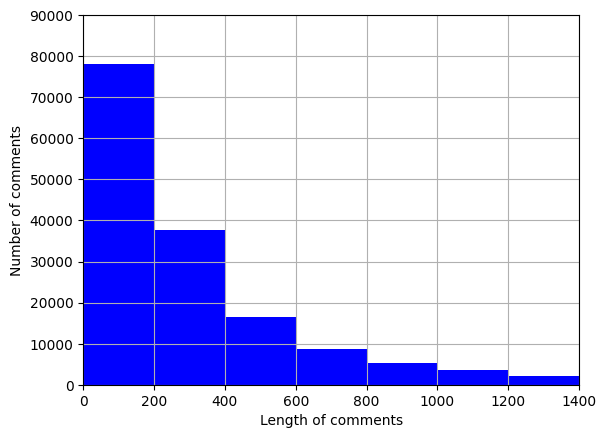

In [15]:
print('The average length of comment is : 394.073' )
bins = [1,200,400,600,800,1000,1200,1400]
plt.hist(x, bins=bins, color = 'Blue')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1400, 0, 90000])
plt.grid(True)
plt.show()  

In [16]:
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head(10))
label = label.values

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0
5      0             0        0       0       0              0
6      1             1        1       0       1              0
7      0             0        0       0       0              0
8      0             0        0       0       0              0
9      0             0        0       0       0              0


In [17]:
label.shape

(159571, 6)

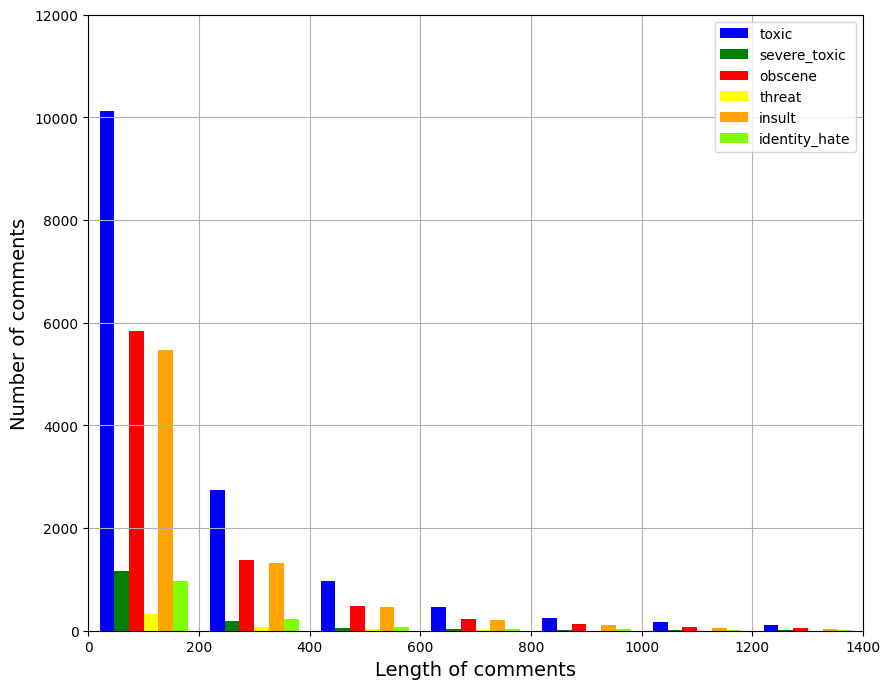

In [19]:
# Creating a zero matrix of shape (159571,6)
y = np.zeros(label.shape)
for i in range(label.shape[0]):
    l = len(comment[i])
    if label[i][0] :
        y[i][0] = l
    if label[i][1] :
        y[i][1] = l
    if label[i][2] :
        y[i][2] = l
    if label[i][3] :
        y[i][3] = l
    if label[i][4] :
        y[i][4] = l
    if label[i][5] :
        y[i][5] = l

label_plot = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['blue','green','red','yellow','orange','chartreuse']    
plt.figure(figsize = (10,8))
plt.hist(y,bins = bins,label = label_plot,color = color)
plt.axis([0, 1400, 0, 12000])
plt.xlabel('Length of comments', fontsize = 14)
plt.ylabel('Number of comments', fontsize = 14) 
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# creating a list of comments with less than 400 length of words.
trim_comments = [comment[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ]

# creating corresponding labels for those comments
my_labels = np.array([label[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ])

In [21]:
my_labels[:10, :]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [22]:
print(len(trim_comments))
print(len(my_labels))
print("Thus number of removed comments = {}".format(159571-115910))

115910
115910
Thus number of removed comments = 43661


In [23]:
print(len(trim_comments))
print(my_labels.shape)

115910
(115910, 6)


In [24]:
import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [25]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Adding alphabets to the set
for i in range(ord('a'),ord('z')+1):
    stop_words.add(chr(i))
print(stop_words)

{'what', 'her', "don't", 'j', "you're", 'such', 'd', 'ours', 'they', "doesn't", 'isn', 'over', 'my', 'then', 'ma', 'once', 'am', 'v', 'z', 're', 'been', 'or', 'weren', 'won', 'is', 'themselves', 'further', 'any', 'during', 'too', 'and', "that'll", 'b', "mightn't", 'k', 'didn', 'to', 'after', 'with', "shouldn't", 'here', 'l', 'below', 'hasn', 'him', 'will', 'no', "wouldn't", 'his', 'does', 'by', 'more', "it's", 'now', "hasn't", 'because', 'c', 'ain', 'should', "didn't", 'that', 'which', 'an', 'them', 'when', 'most', 'through', 'do', 'doing', 'into', "you've", 'being', 'until', 'x', 'all', "you'd", 's', "isn't", 'myself', 'between', 'p', "you'll", 'whom', 'this', 'can', 'm', "couldn't", 'as', 've', 'from', 'he', 'are', 'y', 'having', 'those', 'off', 'h', 'their', 'each', 'did', 'himself', 'against', 'other', "wasn't", 'both', 'few', 'needn', 'don', 'of', 'before', 'we', 'if', 'not', 'yours', 'o', 'she', 'who', 'hers', 'but', 'you', 'very', 'itself', 'u', 'f', 'just', "won't", 'some', "sh

In [26]:
# Stemming and Lemmatizing
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [27]:
# Looping through all the comments and processing them through the functions defined above.
# import nltk
# nltk.download('wordnet')
for i in range(len(trim_comments)):
    trim_comments[i] = trim_comments[i].lower().translate(trantab)
    word_list = []
    for word in trim_comments[i].split():
        if not word in stop_words:
            word_list.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    trim_comments[i]  = " ".join(word_list)

In [28]:
for i in range(5):
    print(trim_comments[i],"\n")

explan edit make usernam hardcor metallica fan revert vandal closur ga vote new york doll fac pleas remov templat talk page sinc i'm retir 

d'aww match background colour i'm seemingli stick thank talk januari utc 

hey man i'm realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info 

sir hero chanc rememb page that' 

congratul well use tool well · talk 



In [29]:
from sklearn.feature_extraction.text import CountVectorizer
 # Convert set to list
stop_words_list = list(stop_words)
#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words_list)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(trim_comments[:60000]).toarray()

In [30]:
tf.shape

(60000, 48419)

In [31]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, my_labels[:60000],3)

print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)

(20000, 48419)
(40000, 48419)
(40000, 6)


In [32]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

In [33]:
# from sklearn.naive_bayes import MultinomialNB
print(X_test.shape)
print(X_train.shape)

(20000, 48419)
(40000, 48419)


In [34]:
print(Y_train.shape)
print(Y_train[:,i])


(40000, 6)
[0 0 1 ... 0 0 0]


In [56]:
# class MultinomialNaiveBayes:
#     def __init__(self):
#         self.class_probs = None
#         self.feature_probs = None

#     def fit(self, X, y, alpha=1.0):
#         num_samples, num_features = X.shape
#         num_classes = y.shape[1]

#         # Calculate class probabilities
#         self.class_probs = (np.sum(y, axis=0) + alpha) / (num_samples + alpha * num_classes)

#         # Calculate feature probabilities
#         self.feature_probs = np.zeros((num_classes, num_features))

#         for c in range(num_classes):
#             class_mask = (y[:, c] == 1)
#             class_data = X[class_mask]
#             total_count = np.sum(class_data) + alpha * num_features

#             for feature in range(num_features):
#                 feature_count = np.sum(class_data[:, feature]) + alpha
#                 self.feature_probs[c, feature] = feature_count / total_count

#     def predict(self, X):
#         predictions = []
#         for sample in X:
#             class_scores = [np.log(self.class_probs[c]) +
#                              np.sum(np.log(self.feature_probs[c, :] ** sample))
#                              for c in range(len(self.class_probs))]
#             predictions.append(np.argmax(class_scores))
#         return np.array(predictions)
class MultinomialNaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.feature_probs = None

    def fit(self, X, y, alpha=1.0):
        num_samples, num_features = X.shape

        if len(y.shape) == 1:
            num_classes = 1
        else:
            num_classes = y.shape[1]

        # Calculate class probabilities
        self.class_probs = (np.sum(y, axis=0) + alpha) / (num_samples + alpha * num_classes)

        # Calculate feature probabilities
        self.feature_probs = np.zeros((num_classes, num_features))

        for c in range(num_classes):
            class_mask = (y[:, c] == 1) if num_classes > 1 else (y == 1)
            class_data = X[class_mask]
            total_count = np.sum(class_data) + alpha * num_features

            for feature in range(num_features):
                feature_count = np.sum(class_data[:, feature]) + alpha
                self.feature_probs[c, feature] = feature_count / total_count

    def predict(self, X):
        predictions = []
        for sample in X:
            sample_array = np.array(sample).reshape(1, -1)  # Ensure sample is a 2D array
            class_scores = [np.log(self.class_probs) +
                             np.sum(np.log(self.feature_probs[c, :] * sample_array))
                             for c in range(len(self.class_probs))]

            predictions.append(np.argmax(class_scores))
        return np.array(predictions)



In [36]:
# class MultinomialNaiveBayes:
#     def __init__(self):
#         self.class_probabilities = {}
#         self.word_probabilities = {}
#         self.classes = []
        
#     def fit(self, X_train, y_train):
#         # Calculate class probabilities
#         total_samples = len(y_train)
#         self.classes = np.unique(y_train)
#         for c in self.classes:
#             self.class_probabilities[c] = np.sum(y_train == c) / total_samples

#         # Calculate word probabilities for each class
#         # word_counts_per_class = {c: defaultdict(int) for c in self.classes}
#         class_word_counts = {c: 0 for c in self.classes}

#         for i in range(total_samples):
#             #print(f"Processing index {i}")
#             class_label = y_train.iloc[i]
#             text_vector = X_train[i]
#             for word_index, count in zip(text_vector.indices, text_vector.data):
#                 word = list(tfidf.vocabulary_.keys())[word_index]
#                 word_counts_per_class[class_label][word] += count
#                 class_word_counts[class_label] += count

#         for c in self.classes:
#             self.word_probabilities[c] = {}
#             total_words = sum(word_counts_per_class[c].values())
#             for word in word_counts_per_class[c]:
#                 self.word_probabilities[c][word] = (
#                     word_counts_per_class[c][word] + 1
#                 ) / (total_words + len(word_counts_per_class[c]))

#     def predict(self, X_test):
#         y_pred = []
#         for sample in X_test:
#             #print(f'processing {sample}')
#             scores = {c: np.log(self.class_probabilities[c]) for c in self.classes}
#             for word_index, count in zip(sample.indices, sample.data):
#                 word = tfidf.get_feature_names_out()[word_index]
#                 for c in self.classes:
#                     if word in self.word_probabilities[c]:
#                         scores[c] += count * np.log(self.word_probabilities[c][word])
#             y_pred.append(max(scores, key=scores.get))
#         return y_pred




In [57]:
clf=[]
for i in range(6):
    clf.append(MultinomialNaiveBayes())
    if len(Y_train.shape) == 1:
        clf[i].fit(X_train, Y_train)  # Y_train is 1D
    else:
        clf[i].fit(X_train, Y_train[:, i])  # Y_train is 2D



In [58]:
print (clf)

[<__main__.MultinomialNaiveBayes object at 0x0000024212232990>, <__main__.MultinomialNaiveBayes object at 0x0000024200A22690>, <__main__.MultinomialNaiveBayes object at 0x00000242125029D0>, <__main__.MultinomialNaiveBayes object at 0x000002420090C1D0>, <__main__.MultinomialNaiveBayes object at 0x000002420090D250>, <__main__.MultinomialNaiveBayes object at 0x00000242009CD650>]


In [60]:
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

predict = np.transpose(predict)
print(predict.shape)



TypeError: object of type 'numpy.float64' has no len()

In [ ]:
evaluate_score(Y_test,predict)

In [ ]:
print(predict)